In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
from math import sqrt
from numpy import split
from numpy import array
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import GRU
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
import matplotlib.pyplot as plt
import math
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd
from datetime import datetime
from keras import optimizers
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score
from numpy import savetxt

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Dongsi.csv to Dongsi.csv


In [ ]:
data=read_csv("Dongsi.csv")
data

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM
0,1,2013,3,1,0,9.0,9.0,3.0,17.0,300.0,89.0,-0.5,1024.5,-21.4,0.0,NNW,5.7
1,2,2013,3,1,1,4.0,4.0,3.0,16.0,300.0,88.0,-0.7,1025.1,-22.1,0.0,NW,3.9
2,3,2013,3,1,2,7.0,7.0,NaN,17.0,300.0,60.0,-1.2,1025.3,-24.6,0.0,NNW,5.3
3,4,2013,3,1,3,3.0,3.0,5.0,18.0,NaN,NaN,-1.4,1026.2,-25.5,0.0,N,4.9
4,5,2013,3,1,4,3.0,3.0,7.0,NaN,200.0,84.0,-1.9,1027.1,-24.5,0.0,NNW,3.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,2,28,19,16.0,51.0,3.0,29.0,400.0,73.0,12.5,1013.5,-16.2,0.0,NW,2.4
35060,35061,2017,2,28,20,18.0,45.0,3.0,43.0,500.0,54.0,11.6,1013.6,-15.1,0.0,WNW,0.9
35061,35062,2017,2,28,21,23.0,58.0,5.0,61.0,700.0,28.0,10.8,1014.2,-13.3,0.0,NW,1.1
35062,35063,2017,2,28,22,23.0,53.0,9.0,75.0,900.0,15.0,10.5,1014.4,-12.9,0.0,NNW,1.2


In [ ]:
def parse(x):
    return datetime.strptime(x, '%Y %m %d %H')
dataset = pd.read_csv('Dongsi.csv',index_col=0, date_parser=parse,parse_dates=[['year', 'month', 'day', 'hour']])

In [ ]:
dataset.drop("No", axis=1, inplace=True)

In [ ]:
dataset=dataset.fillna(method="pad")
dataset

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM
year_month_day_hour,,,,,,,,,,,,
2013-03-01 00:00:00,9.0,9.0,3.0,17.0,300.0,89.0,-0.5,1024.5,-21.4,0.0,NNW,5.7
2013-03-01 01:00:00,4.0,4.0,3.0,16.0,300.0,88.0,-0.7,1025.1,-22.1,0.0,NW,3.9
2013-03-01 02:00:00,7.0,7.0,3.0,17.0,300.0,60.0,-1.2,1025.3,-24.6,0.0,NNW,5.3
2013-03-01 03:00:00,3.0,3.0,5.0,18.0,300.0,60.0,-1.4,1026.2,-25.5,0.0,N,4.9
2013-03-01 04:00:00,3.0,3.0,7.0,18.0,200.0,84.0,-1.9,1027.1,-24.5,0.0,NNW,3.2
...,...,...,...,...,...,...,...,...,...,...,...,...
2017-02-28 19:00:00,16.0,51.0,3.0,29.0,400.0,73.0,12.5,1013.5,-16.2,0.0,NW,2.4
2017-02-28 20:00:00,18.0,45.0,3.0,43.0,500.0,54.0,11.6,1013.6,-15.1,0.0,WNW,0.9
2017-02-28 21:00:00,23.0,58.0,5.0,61.0,700.0,28.0,10.8,1014.2,-13.3,0.0,NW,1.1


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode non categorical values
values = dataset.values
encoder = LabelEncoder()
values[:,10] = encoder.fit_transform(values[:,10])
values = values.astype('float32')
values[:,10]

array([6., 7., 6., ..., 7., 6., 5.], dtype=float32)

In [ ]:
#Normalising data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_dataset = scaler.fit_transform(values)

In [ ]:
#Creating a window for previous data
def to_supervised(train):
  window_size = 4
  X = []
  Y = []
  for i in range(window_size, len(train)):
    X.append(train[i-window_size:i,:])
    Y.append(train[i,0:1])
    
  return X,Y

In [ ]:
X, Y = to_supervised(scaled_dataset)
X = np.array(X)
Y = np.array(Y)
print('Y' ,Y.shape)
print('X' ,X.shape)

Y (35060, 1)
X (35060, 4, 12)


In [ ]:
#Splitting the dataset
n_train = 24*365
X_train, X_test = X[n_train:,] , X[:n_train,]
print('X_train' ,X_train.shape)
print('X_test' ,X_test.shape)

Y_train, Y_test = Y[n_train:,] , Y[:n_train,]
print('Y_train' ,Y_train.shape)
print('Y_test' ,Y_test.shape)

X_train (26300, 4, 12)
X_test (8760, 4, 12)
Y_train (26300, 1)
Y_test (8760, 1)


In [ ]:
#Lstm model build
model = Sequential()
model.add(GRU(units = 50, return_sequences = True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))

model.add(GRU(units = 50, return_sequences = True))
model.add(Dropout(0.2))

model.add(GRU(units = 50))
model.add(Dropout(0.2))
model.add(Dense(units = 50))
model.add(Dense(units = 1))

model.compile(optimizer = 'adam', loss = 'mean_squared_error') 

In [ ]:
GRU_history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=100, batch_size = 64, verbose=1)

Epoch 1/100
411/411 [==============================] - 14s 19ms/step - loss: 0.0028 - val_loss: 0.0014
Epoch 2/100
411/411 [==============================] - 5s 13ms/step - loss: 0.0014 - val_loss: 0.0011
Epoch 3/100
411/411 [==============================] - 5s 13ms/step - loss: 0.0011 - val_loss: 8.6660e-04
Epoch 4/100
411/411 [==============================] - 5s 13ms/step - loss: 0.0011 - val_loss: 9.0075e-04
Epoch 5/100
411/411 [==============================] - 5s 13ms/step - loss: 0.0010 - val_loss: 8.5003e-04
Epoch 6/100
411/411 [==============================] - 5s 13ms/step - loss: 9.8369e-04 - val_loss: 9.2467e-04
Epoch 7/100
411/411 [==============================] - 5s 13ms/step - loss: 9.4575e-04 - val_loss: 8.6508e-04
Epoch 8/100
411/411 [==============================] - 7s 17ms/step - loss: 9.3104e-04 - val_loss: 9.0153e-04
Epoch 9/100
411/411 [==============================] - 6s 13ms/step - loss: 9.2255e-04 - val_loss: 8.2755e-04
Epoch 10/100
411/411 [===============

In [ ]:
from keras.models import load_model
model.save('AirPollutionGRU.h5')

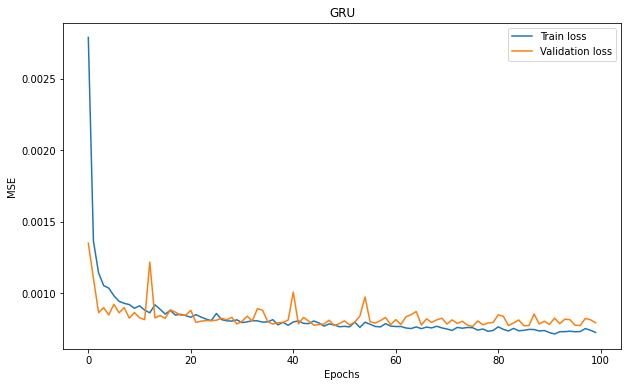

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.figure(figsize=(10,6))  
plt.plot(GRU_history.history['loss'], label='Train loss')
plt.plot(GRU_history.history['val_loss'], label='Validation loss')
plt.title("GRU")
plt.xlabel("Epochs")
plt.ylabel("MSE")
plt.legend()
plt.show()
plt.savefig('GRU.png')

In [ ]:
RMSE1=[]
RMAE1=[]
MAPE1=[]
R22=[]

for i in range(40, 181, 5):
  Y_pred = model.predict(X_test[:i,:])
  #print(Y_pred)
  #Scaling back to the original scale
  d = scaled_dataset[:i,:]
  Y_predicted = np.concatenate((Y_pred,d[:,1:]), axis =1)
  Y_tested = np.concatenate((Y_test[:i,], d[:i,1:]), axis = 1)
  #Scaling back to the original scale
  d = scaled_dataset[:i,:]
  Y_predicted = np.concatenate((Y_pred,d[:i,1:]), axis =1)
  Y_tested = np.concatenate((Y_test[:i,], d[:i,1:]), axis = 1)
  Y_predicted = scaler.inverse_transform(Y_predicted)
  Y_tested = scaler.inverse_transform(Y_tested)
  Y_predicted = Y_predicted[:,0:1]
  Y_tested = Y_tested[:i,0:1]
  mse = mean_squared_error(Y_tested, Y_predicted)
  rmse = np.sqrt(mse)
  print("RMSE at %s = %s" % (i, rmse))
  RMSE1=np.append(RMSE1,rmse)
  mae = mean_absolute_error(Y_tested, Y_predicted)
  rmae = np.sqrt(mae)
  RMAE1=np.append(RMAE1,rmae)
  print("RMAE at %s = %s" % (i, rmae))
  mape = mean_absolute_percentage_error(Y_tested, Y_predicted)
  print("MAPE at %s = %s" % (i, mape))
  MAPE1=np.append(MAPE1,mape)
  #R2 score
  R2 = r2_score( Y_predicted, Y_tested)
  print("R2 at %s = %s" % (i, R2))
  R22=np.append(R22,R2)

2/2 [==============================] - 0s 7ms/step
RMSE at 40 = 5.5839114
RMAE at 40 = 2.1090076
MAPE at 40 = 0.90797883
R2 at 40 = 0.8601962979579438
2/2 [==============================] - 0s 8ms/step
RMSE at 45 = 5.6983337
RMAE at 45 = 2.1401324
MAPE at 45 = 0.813997
R2 at 45 = 0.9583863598960919
2/2 [==============================] - 0s 8ms/step
RMSE at 50 = 6.0318785
RMAE at 50 = 2.225098
MAPE at 50 = 0.73966223
R2 at 50 = 0.9763021930845447
2/2 [==============================] - 0s 7ms/step
RMSE at 55 = 6.545288
RMAE at 55 = 2.2944078
MAPE at 55 = 0.6804896
R2 at 55 = 0.9745739262356669
2/2 [==============================] - 0s 7ms/step
RMSE at 60 = 7.1175394
RMAE at 60 = 2.372877
MAPE at 60 = 0.63189566
R2 at 60 = 0.9704403585632788
3/3 [==============================] - 0s 6ms/step
RMSE at 65 = 7.399087
RMAE at 65 = 2.4175515
MAPE at 65 = 0.5934139
R2 at 65 = 0.9683999244472169
3/3 [==============================] - 0s 5ms/step
RMSE at 70 = 9.349828
RMAE at 70 = 2.626465
MAPE at

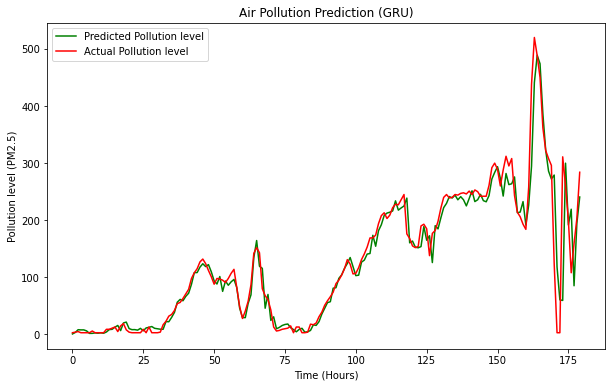

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.figure(figsize=(10,6))  
plt.plot(Y_predicted, color= 'green',label = 'Predicted Pollution level')
plt.plot(Y_tested , color = 'red',label = 'Actual Pollution level')
plt.title("Air Pollution Prediction (GRU)")
plt.xlabel("Time (Hours)")
plt.ylabel("Pollution level (PM2.5)")
plt.legend()
plt.show()
plt.savefig('graph_GRU.png')

In [ ]:
savetxt('Predict_GRU.csv', Y_predicted, delimiter=',')

In [ ]:
savetxt('Test_GRU.csv', Y_test, delimiter=',')